# Data Analysis

In [42]:
import dlc_bci as bci
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 28
plt.style.use('ggplot')
plt.rcParams["axes.grid"] = False
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['figure.figsize'] = 8, 4

In [5]:
train_input, train_target = bci.load(root = './data_bci', train=True, one_khz=True)
print(str(type(train_input)), train_input.size())
print(str(type(train_target)), train_target.size())

<class 'torch.FloatTensor'> torch.Size([316, 28, 500])
<class 'torch.LongTensor'> torch.Size([316])


In [6]:
test_input, test_target = bci.load(root = './data_bci', train=False, one_khz=True)
print(str(type(test_input)), test_input.size())
print(str(type(test_target)), test_target.size())

<class 'torch.FloatTensor'> torch.Size([100, 28, 500])
<class 'torch.LongTensor'> torch.Size([100])


In [7]:
# Setting the time as the second dimension
train_input = train_input.permute(0,2,1)
test_input = test_input.permute(0,2,1)

## 1 Mean & standard deviation

In [9]:
train_mean = train_input.contiguous().view(-1, 28).mean(dim=0)
train_std_dev = train_input.contiguous().view(-1, 28).std(dim=0)

test_mean = test_input.contiguous().view(-1, 28).mean(dim=0)
test_std_dev = test_input.contiguous().view(-1, 28).std(dim=0)

In [25]:
sensor_ids = np.arange(len(train_mean))

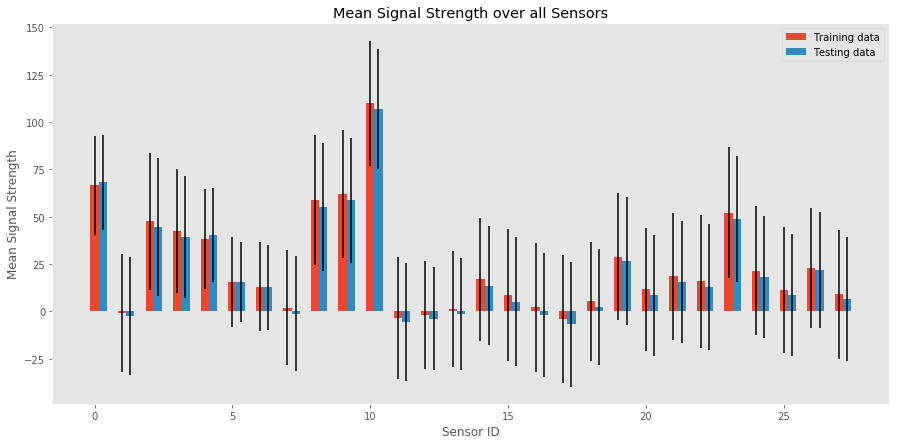

In [53]:
plt.figure(figsize=(15,7))
w=0.3
plt.bar(sensor_ids, train_mean, width=w, align='center', label='Training data', yerr=train_std_dev)
plt.bar(sensor_ids+w, test_mean, width=w, align='center', label='Testing data', yerr=test_std_dev)
plt.xlabel('Sensor ID')
plt.ylabel('Mean Signal Strength')
plt.title('Mean Signal Strength over all Sensors')
plt.legend()
plt.show()

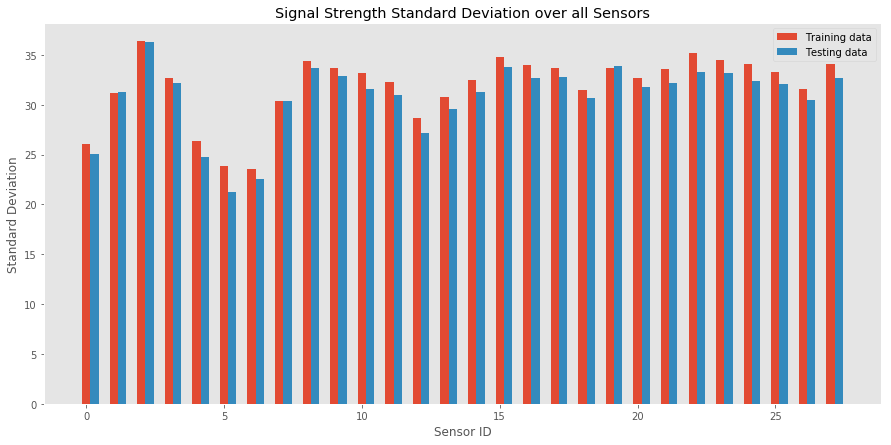

In [52]:
plt.figure(figsize=(15,7))
w=0.3
plt.bar(sensor_ids, train_std_dev, width=w, align='center', label='Training data')
plt.bar(sensor_ids+w, test_std_dev, width=w, align='center', label='Testing data')
plt.xlabel('Sensor ID')
plt.ylabel('Standard Deviation')
plt.title('Signal Strength Standard Deviation over all Sensors')
plt.legend()
plt.show()

## 2 Visualizing EEG datapoints

### One datapoint

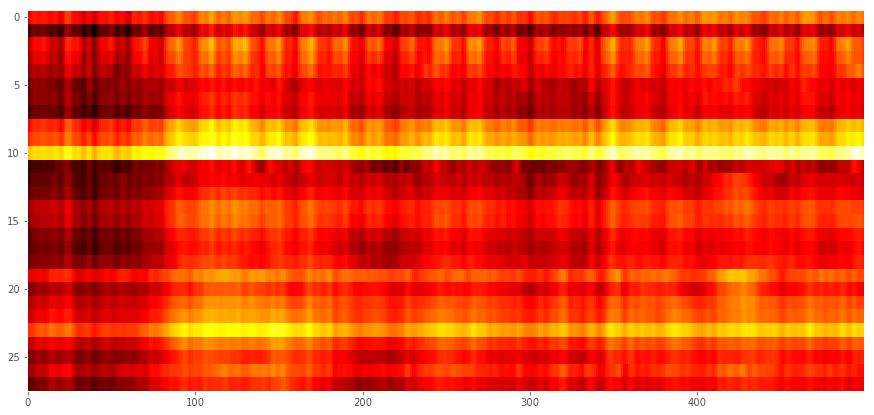

In [67]:
plt.figure(figsize=(15,7))
plt.imshow(train_input[0].permute(1,0), cmap='hot', aspect='auto')
plt.show()

### Mean, median and standard deviation of right and left button presses

In [70]:
right_indices = train_target.nonzero()
left_indices = (train_target == 0).nonzero()

# reshape from [num_indices, 1] to [num_indices]
right_indices = right_indices.view(-1)
left_indices = left_indices.view(-1)

In [71]:
right_data = torch.index_select(train_input, 0, right_indices)
left_data = torch.index_select(train_input, 0, left_indices)

In [109]:
right_mean = right_data.contiguous().mean(dim=0)
right_median = right_data.contiguous().median(dim=0)[0]
right_std = right_data.contiguous().std(dim=0)

left_mean = left_data.contiguous().mean(dim=0)
left_median = left_data.contiguous().median(dim=0)[0]
left_std = left_data.contiguous().std(dim=0)

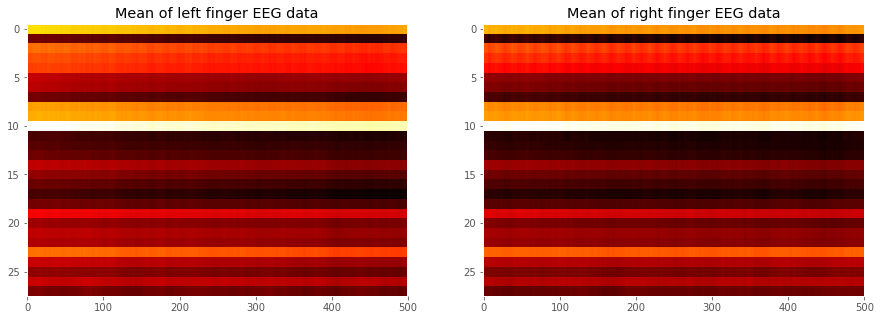

In [102]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.imshow(left_mean.permute(1,0), cmap='hot', aspect='auto')
ax1.set_title('Mean of left finger EEG data')
ax2.imshow(right_mean.permute(1,0), cmap='hot', aspect='auto')
ax2.set_title('Mean of right finger EEG data')

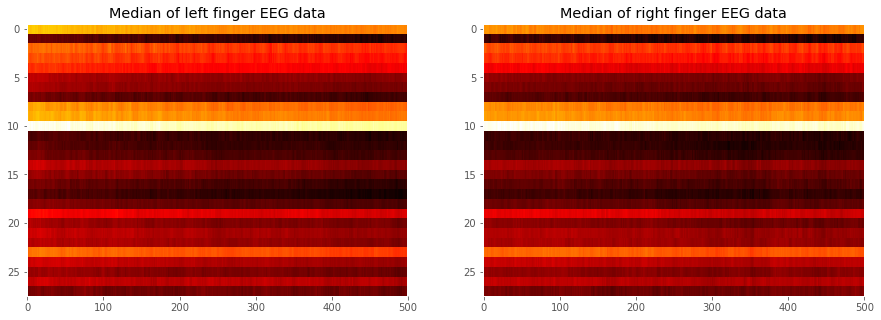

In [110]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.imshow(left_median.permute(1,0), cmap='hot', aspect='auto')
ax1.set_title('Median of left finger EEG data')
ax2.imshow(right_median.permute(1,0), cmap='hot', aspect='auto')
ax2.set_title('Median of right finger EEG data')

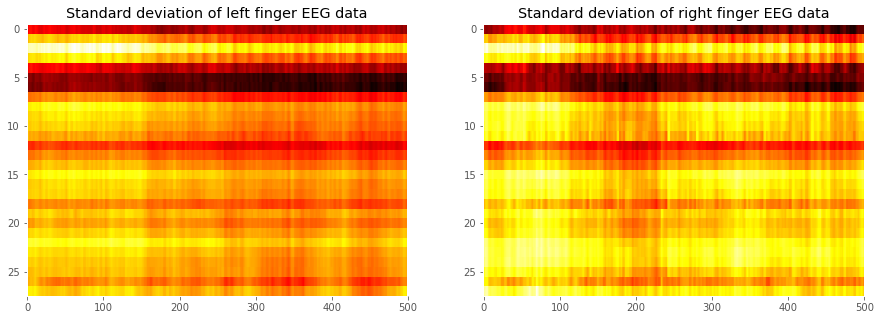

In [104]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.imshow(left_std.permute(1,0), cmap='hot', aspect='auto')
ax1.set_title('Standard deviation of left finger EEG data')
ax2.imshow(right_std.permute(1,0), cmap='hot', aspect='auto')
ax2.set_title('Standard deviation of right finger EEG data')

### Median over some sensor

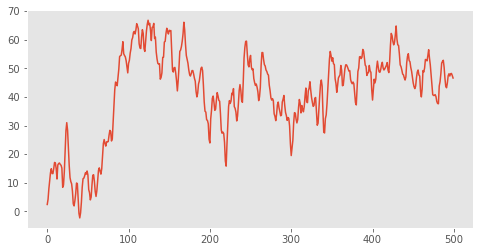

In [154]:
x = train_input[0].contiguous().median(dim=1)[0]
plt.plot(x)